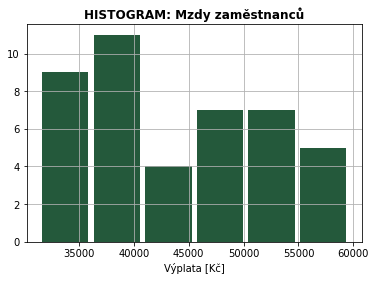

In [1]:
import pandas
import matplotlib.pyplot as plt

file = "platy_2021_02.csv"
platy = pandas.read_csv(file, index_col='cislo_zamestnance')
platy.hist(
            bins = 6,
            rwidth = 0.9,
            facecolor = "#24593B"
            )
plt.title("HISTOGRAM: Mzdy zaměstnanců",
          fontweight ="bold")
plt.xlabel("Výplata [Kč]")
plt.show()


### Dobrovolný doplněk

In [2]:
zam_praha = pandas.read_csv("zam_praha.csv") 
zam_plzen = pandas.read_csv("zam_plzeň.csv") 
zam_liberec = pandas.read_csv("zam_liberec.csv") 

zam_praha["mesto"] = "Praha"
zam_plzen["mesto"] = "Plzeň"
zam_liberec["mesto"] = "Liberec"

zamestnanci = pandas.concat([zam_praha,zam_plzen,zam_liberec], ignore_index = True)

zamestnanci_s_platy = pandas.merge(zamestnanci, platy, on = ["cislo_zamestnance"], how="left")


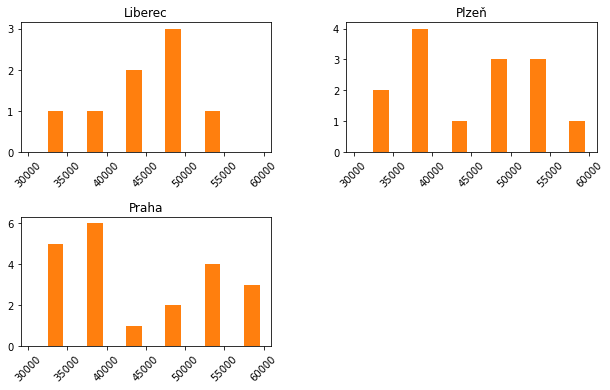

In [3]:
zamestnanci_s_platy.hist(
    by="mesto",
    bins = 6,
    range = (30000,60000),
    xrot = 45,
    figsize = (10,6)
    )

# plt.savefig('ukol-12_platy.jpg')

plt.show()


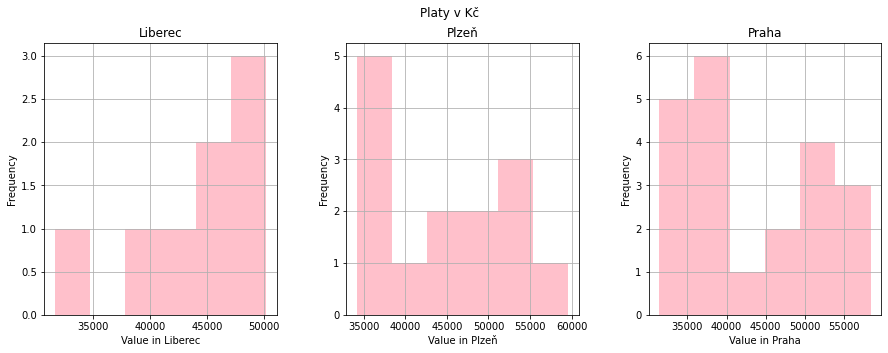

In [4]:
## pro ULTRA zvidave
import pandas
import matplotlib.pyplot as plt

# Vytvoris si prostor, kam budes sazet pod-grafy
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Platy v Kč')
fig.set_size_inches(15, 5)

# Vytvoris si jednotlive grafy
for ax, (mesto, subdf) in zip(axes.flatten(), zamestnanci_s_platy.groupby('mesto')):
    subdf.hist('plat', ax=ax, bins = 6, color="pink")
    ax.set_title(mesto)
    ax.set_xlabel(f"Value in {mesto}")
    ax.set_ylabel("Frequency")

plt.show()


## Teplota ve městech

Vrať se k práci se souborem temperature.csv, který obsahuje informace o průměrné teplotě v různých městech v listopadu 2017.

Vytvoř tabulku, která bude obsahovat údaje o teplotě za města Helsinki, Miami Beach a Tokyo.

Vytvoř krabicový graf a porovnej rozsah teplot v těchto městech.

In [5]:
import requests

r = requests.get("https://raw.githubusercontent.com/andywaltlova/python-1-podzim-2022/master/ukoly/data/temperature.csv")
open("temperature.csv", "wb").write(r.content)

316099

In [6]:
import pandas

temperatures = pandas.read_csv("temperature.csv")
temperatures.head()

vybrana_mesta = temperatures[temperatures["City"].isin(["Helsinki", "Miami Beach", "Tokyo"])]
vybrana_mesta = vybrana_mesta[["City", "AvgTemperature"]]

<AxesSubplot:>

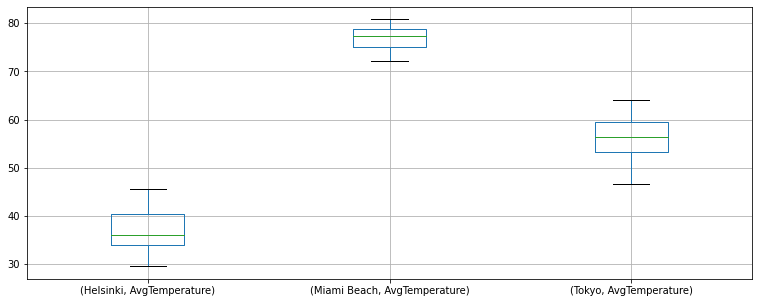

In [7]:
grouped = vybrana_mesta.groupby("City")
grouped.boxplot(figsize=(13,5), subplots=False)  

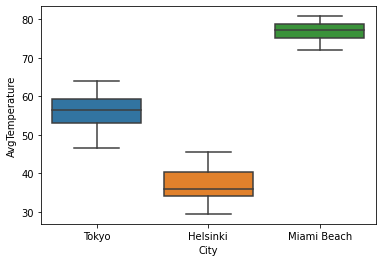

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=vybrana_mesta, 
            x='City', 
            y='AvgTemperature',
            )

plt.show()
